# Исследование аудитории сервиса самокатов GoFast.

## Введение

**Контекст**

В исследовании мы рассматриваем пользователей сервиса самокатов GoFast.


**Цель исследования**

Необходимо проверить ряд гипотез, которые позволят наметить план для дальнейшей популяризации сервиса и увеличения доходности бизнеса.


**О данных**

В нашем распоряжении 3 набора данных:
1. Данные о пользователях:
   - id
   - имя
   - возраст
   - город
   - тип пользователя: с подпиской и без
2. Данные о поездках:
   - id пользователя, который совершил поездку
   - дата поездки
   - продолжительность
   - дальность
3. Условия использования сервиса для пользователей с подпиской и без
   - абонентская плата
   - стоимость минуты поездки
   - стоимость старта поездки

**Ход исследования**

Исследование включает в себя следующие шаги:
1. Обзор и предобработка данных.
2. Исследование основных значений для всех пользователей:
   - популярность сервиса по городам;
   - распределение типов пользователей;
   - возраст пользователей;
   - дальность поездок;
   - продолжительность поездок;
3. Исследование основных значений по типам пользователей:
   - дальность поездок;
   - продолжительность поездок;
4. Проверка гипотез для планирования развития сервиса:
   - Гипотеза №1: пользователи с подпиской тратят больше времени на поездки.
   - Гипотеза №2: средняя дальность поездки пользователей с подпиской составляет 3130 метров.
   - Гипотеза №3: помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.
   - Гипотеза №4: обновление серверов уменьшает количество обращений в поддержку.
5. Рассчеты для планирования промо:
   - Промо с раздачей промокодов для привлечения новых подписчиков.
   - Промо с рассылкой push-уведомлений.
6. Выводы


## Предобработка данных

### Импорт библиотек и данных

In [67]:
#импортируем библиотеки для работы
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


In [68]:
#импортируем данные о пользователях
try:
    users = pd.read_csv('Desktop/practicum cases/users_go.csv')
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

#импортируем данные о поездках
try:
    rides = pd.read_csv('Desktop/practicum cases/rides_go.csv')
except:
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')

#импортируем данные о тарифах
try:
    subscriptions = pd.read_csv('Desktop/practicum cases/subscriptions_go.csv')
except:
    subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

### Ревизия данных о пользователях

In [69]:
#проверим данные о пользователях
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [70]:
#оценим объем и тип данных
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [71]:
#проверим на пропуски
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [72]:
#проверим на явные дубликаты
users.duplicated().sum()

31

In [73]:
#удалим явные дубликаты
users = users.drop_duplicates().reset_index(drop=True)

#посмотрим на таблицу еще раз
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


### Ревизия данных о поездках

In [74]:
#проверим данные о поездках
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [75]:
#оценим объем и тип данных
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [76]:
#проверим на пропуски
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [77]:
#проверим на явные дубликаты
rides.duplicated().sum()

0

In [78]:
#оценим период данных, чтобы в дальнейшем не иметь повторов в значениях месяцев
display(rides['date'].min())
rides['date'].max()

'2021-01-01'

'2021-12-30'

Отлично, все данные - за один год.

In [79]:
#приведем к формату datetime данные в колонке с датой поездки
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

#добавим к таблице колонку с номером месяца поездки
rides['month'] = rides['date'].dt.month

#округлим значения в столбце времени поездки до целых значений в верхнюю сторону
rides['duration'] = np.ceil(rides['duration'])


#оценим результат
rides.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,26.0,2021-01-01,1
1,1,2617.592153,16.0,2021-01-18,1
2,1,754.159807,7.0,2021-04-20,4
3,1,2694.783254,19.0,2021-08-11,8
4,1,4028.687306,27.0,2021-08-28,8
5,1,2770.890808,17.0,2021-10-09,10
6,1,3039.020292,15.0,2021-10-19,10
7,1,2842.118050,24.0,2021-11-06,11
8,1,3412.690668,16.0,2021-11-14,11
9,1,748.690645,16.0,2021-11-22,11


In [80]:
#проверим изменение формата
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


### Ревизия данных о тарифах

In [81]:
#проверим данные о тарифах
subscriptions.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Это будет моя любимая таблица в проекте.

### Выводы о предобработке данных

- В таблице users названия столбцов в норме, пропуски отсутствуют, тип данных корректный, явные дубликаты (31 строка) удалены. Сейчас в таблице 1565 строк.
- В таблице rides названия столбцов в норме, пропуски отсутствуют, тип данных в столбце о дате поездки изменен на datetime, в столбце о длительности поездок округлили данные до целых чисел вверх, явных дубликатов нет. Сейчас в таблице 18068 строк.
- В таблице subscriptions названия столбцов в норме, пропуски отсутствуют, тип данных корректный, явные дубликаты отсутствуют. Сейчас в таблице 2 строки.

## Исследовательский анализ данных

### Какие города встречаются чаще

In [82]:
#посмотрим, какие города встречаются в данных, и сколько пользователей в каждом из них
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

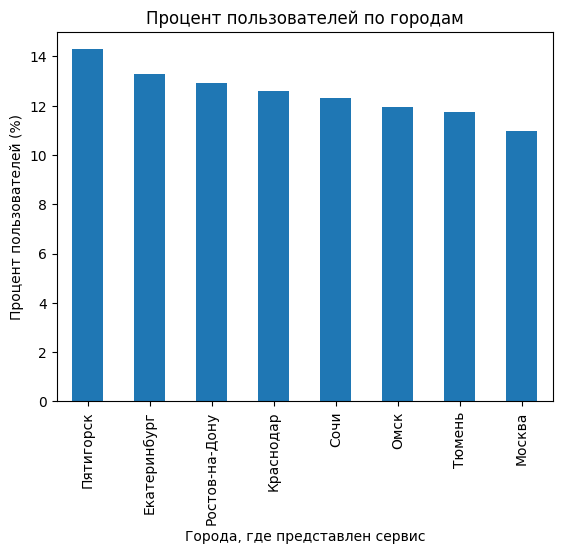

In [83]:
#вычислим процент пользователей по городам
city_counts = users['city'].value_counts(normalize=True) * 100

#визуализируем распределение пользователей по городам
city_counts.plot(kind='bar')

plt.ylabel('Процент пользователей (%)')
plt.xlabel('Города, где представлен сервис')
plt.title('Процент пользователей по городам')
plt.show()

- Больше всего пользователей в Пятигорске — 219 человек, 14.3% от всех пользователей.
- Меньше всего пользователей в Москве — 168 человек, 11% от всех пользователей.
- В целом сервис везде почти одинаково популярен.

### Типы пользователей

In [85]:
#оценим число пользователей с подпиской и без
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

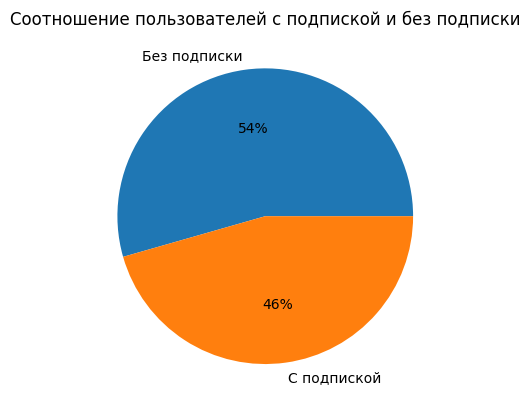

In [86]:
#вычислим процент пользователей с подпиской и без
subscribers_counts = users['subscription_type'].value_counts(normalize=True) * 100
subscribers_counts.index = ['Без подписки', 'С подпиской']

#визуализируем
subscribers_counts.plot(
    kind= 'pie',
    title= 'Соотношение пользователей с подпиской и без подписки',
    autopct = "%.0f%%",
    ylabel= ""
)
plt.show()

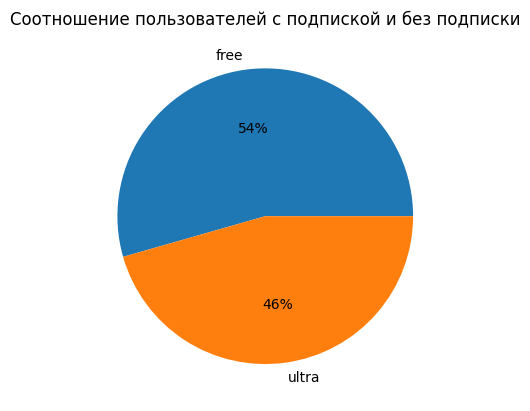

In [87]:
# Комментарий ревьюера
import matplotlib.pyplot as plt
temp = users.copy()
temp['subscription_type'].value_counts().plot(
    kind= 'pie',
    title= 'Соотношение пользователей с подпиской и без подписки',
    autopct = "%.0f%%",
    ylabel= ""
)
plt.show()

- Пользователей без подписки на 8% больше, чем пользователей с подпиской: 54% против 46% соответственно.

### Возраст пользователей

In [88]:
#оценим разброс пользователей по возрастам
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

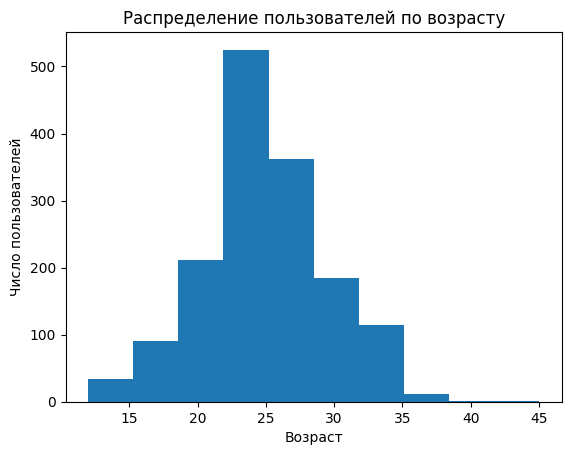

In [89]:
#визуализируем возраста пользователей на графике
users.hist(column='age', bins=10, range=(12, 45), grid=False);

plt.title('Распределение пользователей по возрасту')
plt.ylabel('Число пользователей')
plt.xlabel('Возраст')

plt.show()

- Большая часть пользователей проживают свой третий десяток: медиана 25 лет.
- 50% всех пользователей - в возрасте от 22 до 28.
- Среди пользователей есть чуть меньше 100 человек несовершеннолетних, включая подростка 12 лет. Эта группа не сильно заметна в общем числе пользователей, зато (в потенциале) очень ярко выглядит в новостях о ДТП с самокатчиком. 

### Расстояние поездок

In [90]:
#оценим разброс поездок по дистанции
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

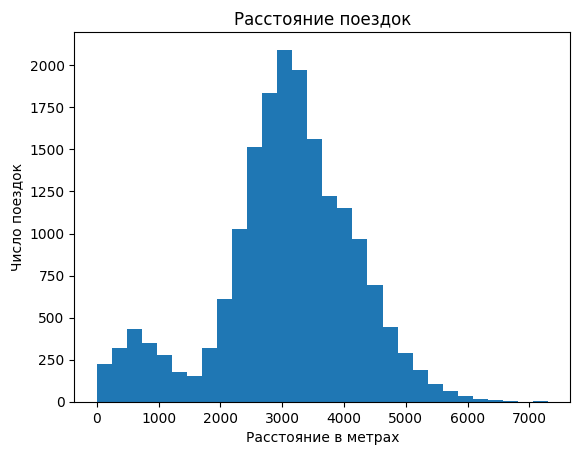

In [91]:
#визуализируем расстояние поездок на графике
rides.hist(column='distance', bins=30, range=(0, 7300), grid=False);

plt.title('Расcтояние поездок')
plt.ylabel('Число поездок')
plt.xlabel('Расстояние в метрах')

plt.show()

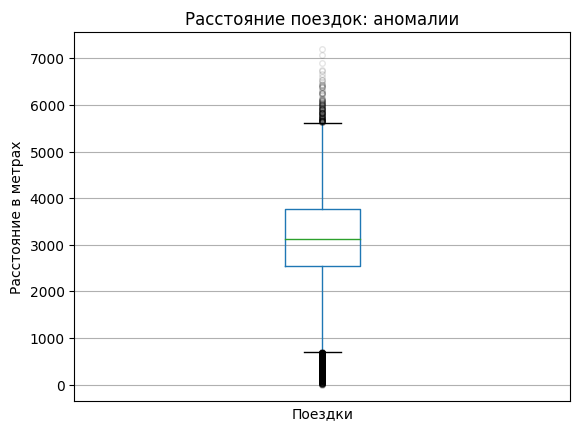

In [92]:
#построим поближе на аномаллии
rides.boxplot(column='distance', flierprops=dict(marker='o', markersize=4, alpha=0.1));

plt.title('Расстояние поездок: аномалии')
plt.ylabel('Расстояние в метрах')
plt.xticks([])
plt.xlabel('Поездки')

plt.show()

- В среднем пользователи проезжают 3070 метров за поездку, медиана - 3133.
- 50% поездок - в диапазоне от 2500 до 3800 метров.
- Микропик из нетипично коротких поездок диапазоне 400-1000 метров - это, вероятно, в большинстве своем граждане, которые решили открыть для себя езду на самокате, но через квартал поняли, что расшибут себе голову.
- Поездки на расстояние больше 5500 метров скорее аномальны, но в небольшом объеме вполне похожи на правду.

### Длительность поездок 

In [93]:
#оценим разброс поездок по длительности
rides['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

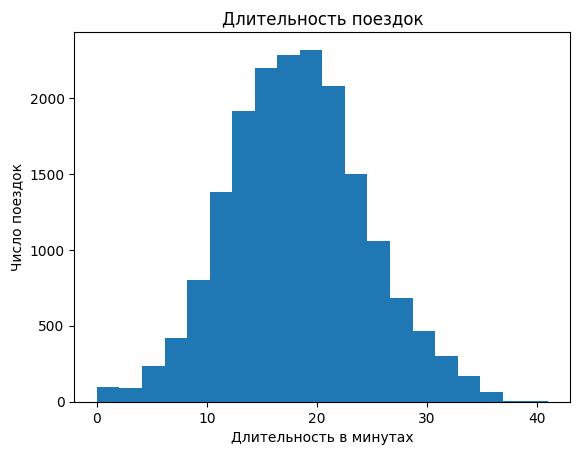

In [94]:
#визуализируем длительность поездок на графике
rides.hist(column='duration', bins=20, range=(0, 41), grid=False);

plt.title('Длительность поездок')
plt.ylabel('Число поездок')
plt.xlabel('Длительность в минутах')

plt.show()

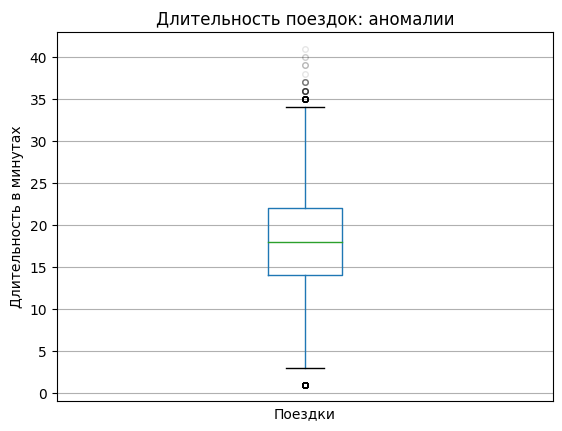

In [95]:
#построим поближе на аномаллии
rides.boxplot(column='duration', flierprops=dict(marker='o', markersize=4, alpha=0.1));

plt.title('Длительность поездок: аномалии')
plt.ylabel('Длительность в минутах')
plt.xticks([])
plt.xlabel('Поездки')

plt.show()

In [96]:
rides.query('duration <= 1')

,user_id,distance,duration,date,month
6531,701,4196.445201,1.0,2021-08-31,8
6570,704,4830.824371,1.0,2021-10-14,10
6680,712,4684.004397,1.0,2021-03-04,3
6695,713,5215.642710,1.0,2021-02-25,2
6768,718,5197.436649,1.0,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,1.0,2021-01-19,1
17242,1477,6724.932981,1.0,2021-01-12,1
17314,1483,4445.481070,1.0,2021-03-06,3
17505,1496,5722.551787,1.0,2021-02-14,2


- В среднем пользователи проводят в поездке 18.3 минуты, медиана - 18 минут.
- 50% поездок - в диапазоне от 14 до 22 минут.
- В целом картина (ожидаемо) похожая на график расстояний: и микропик на времени для проехать квартал и одуматься, и небольшой хвост для больших поездок - по времени и расстоянию.
- Примечательно, что у нас есть очень большое количество выбросов конкретно на минуте (что не совсем укладывается в идею "попробовал самокат - не сложилось - оставил"). Когда мы смотрим на сами "поездки-минутки", мы видим, что их 95 штук и расстояния в них весьма большие, порой огромные (больше 6 км) что за минуту никак не преодолеть. Такая ситуация говорит скорее о дефекте счетчика времени (с соответствующими последствиями для доходности бизнеса поминутной аренды самокатов).

### Выводы из исследовательского анализа

- Сервис в целом одинаково популярен во всех городах из базы данных. Популярнее всего - в Пятигорске. Наименее популярен - в Москве.
- Езда без подписки - явление несколько более распространенное, чем по подписке: 54% против 46% соответственно.
- Большая часть пользователей проживают свой третий десяток: медиана 25 лет, 50% всех пользователей - в возрасте от 22 до 28.
- В среднем пользователи проезжают 3070 метров за поездку, медиана - 3133, 50% поездок - в диапазоне от 2500 до 3800 метров.
- В среднем пользователи проводят в поездке 18.3 минуты, медиана 18 минут, 50% поездок - в диапазоне от 14 до 22 минут.
- Необъяснимых и опасных аномалий для рассчетов не выявлено.
- Выявлена опасная аномалия для статистики ДТП - сотня самокатчиков-подростков.
- Выявлена аномалия с поездками длительностью до минуты: таких 95 штук, но расстояния в них большие, что говорит о проблемах со счетчиком времени.

## Группировка данных по типу пользователей

In [97]:
#объединим данные о пользователях, поездках и подписках в один датафрейм с помощью merge()
users_full = rides.merge(users, how='outer', on='user_id')

#посмотрим на получившуюся таблицу
users_full.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra
5,1,2770.890808,17.0,2021-10-09,10,Кира,22,Тюмень,ultra
6,1,3039.020292,15.0,2021-10-19,10,Кира,22,Тюмень,ultra
7,1,2842.118050,24.0,2021-11-06,11,Кира,22,Тюмень,ultra
8,1,3412.690668,16.0,2021-11-14,11,Кира,22,Тюмень,ultra
9,1,748.690645,16.0,2021-11-22,11,Кира,22,Тюмень,ultra


In [98]:
#проверим данные в сводной таблице
users_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.4+ MB


In [99]:
#проверим сводную таблицу на пропуски
users_full.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [100]:
#ну и на дублткаты проверим, потому что можем
users_full.duplicated().sum()

0

### Пользователи без подписки

In [101]:
#аккумулируем пользователей без подписки в отдельную таблицу
users_non_subscribers = users_full.query('subscription_type == "free"')

#интересно, что вышло
users_non_subscribers.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type
6500,700,2515.690719,15.0,2021-01-02,1,Айдар,22,Омск,free
6501,700,846.932642,17.0,2021-02-01,2,Айдар,22,Омск,free
6502,700,4004.434142,21.0,2021-02-04,2,Айдар,22,Омск,free
6503,700,1205.911290,10.0,2021-02-10,2,Айдар,22,Омск,free
6504,700,3047.379435,18.0,2021-02-14,2,Айдар,22,Омск,free
6505,700,4342.002254,23.0,2021-02-23,2,Айдар,22,Омск,free
6506,700,3798.334905,19.0,2021-03-03,3,Айдар,22,Омск,free
6507,700,2984.551206,16.0,2021-04-09,4,Айдар,22,Омск,free
6508,700,3360.107141,17.0,2021-06-12,6,Айдар,22,Омск,free
6509,700,2567.543847,12.0,2021-06-23,6,Айдар,22,Омск,free


In [102]:
#проверим данные в таблице
users_non_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   distance           11568 non-null  float64       
 2   duration           11568 non-null  float64       
 3   date               11568 non-null  datetime64[ns]
 4   month              11568 non-null  int64         
 5   name               11568 non-null  object        
 6   age                11568 non-null  int64         
 7   city               11568 non-null  object        
 8   subscription_type  11568 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 903.8+ KB


In [103]:
#проверим пропуски
users_non_subscribers.isna().sum()


user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [104]:
#проверим дубликаты
users_non_subscribers.duplicated().sum()

0

In [105]:
#оценим статистические данные о пользователях без подписки
users_non_subscribers.describe()

,user_id,distance,duration,month,age
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000
mean,1120.527230,3045.495282,17.890992,6.522994,24.893326
std,241.165628,1246.173806,6.330250,3.449770,4.481100
min,700.000000,0.855683,1.000000,1.000000,12.000000
25%,915.000000,2366.562689,13.000000,4.000000,22.000000
50%,1123.000000,3114.648465,18.000000,7.000000,25.000000
75%,1328.000000,3905.697894,22.000000,9.000000,28.000000
max,1534.000000,7211.007745,35.000000,12.000000,43.000000


- В сводном датасете было 18068 поездок, и, как мы видим, почти 2/3 из них приходится на пользователей без подписки, хотя само число пользователей с подпиской и без отличается меньше, чем на 10%.

#### Расстояние поездок

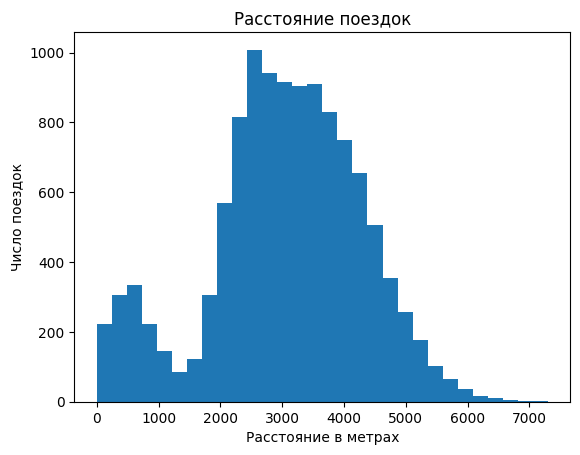

In [106]:
#визуализируем данные по расстоянию, которое проезжают за одну поездку пользователи без подписки
users_non_subscribers.hist(column='distance', bins=30, range=(0, 7300), grid=False);

plt.title('Расcтояние поездок')
plt.ylabel('Число поездок')
plt.xlabel('Расстояние в метрах')

plt.show()

- По графику заметно, что большая часть экстремальных-аномальных поездок (на 2 квартала и на 7 км) - дело пользователей без подписки: и пик на короткие дистанции здесь ярче выражен, и хвост супердлинных поездок на месте. 
- В целом же картина осталась та же, просто с небольшой поправкой на число экстремальных значений: медиана 3114 м, 50% значений - в диапазоне от 2300 до 3900 (для сравнения, в общем датасете - от 2500 до 3800).

#### Длительность поездок

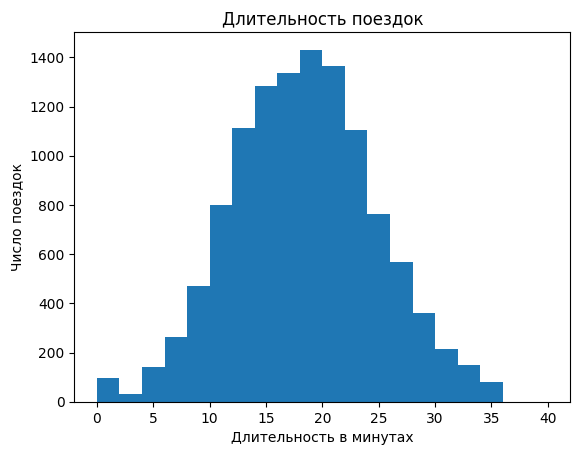

In [107]:
#визуализируем данные по длительности поездок пользователей без подписки
users_non_subscribers.hist(column='duration', bins=20, range=(0, 40), grid=False);

plt.title('Длительность поездок')
plt.ylabel('Число поездок')
plt.xlabel('Длительность в минутах')

plt.show()

- График предсказуемо схож с графиком расстояний, особенно тот же пик на суперкороткие поездки.
- В остальном среднее время поездки примерно то же, что и в целом, как и диапазон времени основного числа поездок (с поправкой на любовь к суперкоротким тестовым заездам): медиана 18, и 50% значений - в диапазоне от 13 до 22 минут.

### Пользователи с подпиской

In [108]:
#аккумулируем пользователей с подпиской в отдельную таблицу
users_subscribers = users_full.query('subscription_type == "ultra"')

#интересно, что вышло
users_subscribers.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra
5,1,2770.890808,17.0,2021-10-09,10,Кира,22,Тюмень,ultra
6,1,3039.020292,15.0,2021-10-19,10,Кира,22,Тюмень,ultra
7,1,2842.118050,24.0,2021-11-06,11,Кира,22,Тюмень,ultra
8,1,3412.690668,16.0,2021-11-14,11,Кира,22,Тюмень,ultra
9,1,748.690645,16.0,2021-11-22,11,Кира,22,Тюмень,ultra


In [109]:
#проверим данные
users_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   distance           6500 non-null   float64       
 2   duration           6500 non-null   float64       
 3   date               6500 non-null   datetime64[ns]
 4   month              6500 non-null   int64         
 5   name               6500 non-null   object        
 6   age                6500 non-null   int64         
 7   city               6500 non-null   object        
 8   subscription_type  6500 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 507.8+ KB


In [110]:
#проверим пропуски
users_subscribers.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [111]:
#проверим дубликаты
users_subscribers.duplicated().sum()

0

In [112]:
#оценим статистические данные о пользователях без подписки
users_subscribers.describe()

,user_id,distance,duration,month,age
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,348.725385,3115.445388,19.037692,6.422308,24.892615
std,201.099339,836.895330,5.577439,3.414616,4.757208
min,1.000000,244.210438,4.000000,1.000000,12.000000
25%,175.000000,2785.444017,15.000000,4.000000,22.000000
50%,351.000000,3148.637229,19.000000,6.000000,25.000000
75%,525.000000,3560.574425,22.000000,9.000000,28.000000
max,699.000000,5699.769662,41.000000,12.000000,38.000000


#### Расстояние поездок

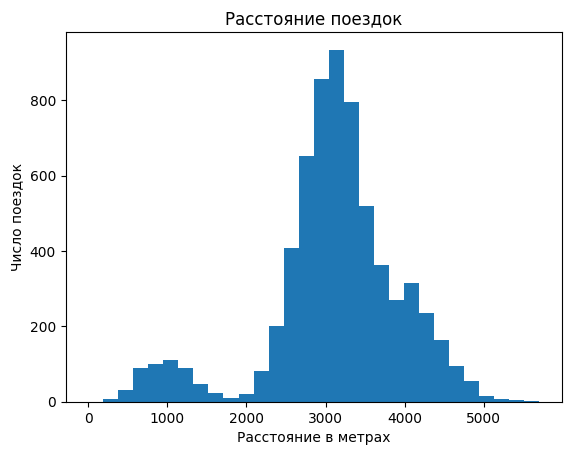

In [113]:
#визуализируем данные по расстоянию, которое проезжают за одну поездку пользователи с подпиской
users_subscribers.hist(column='distance', bins=30, range=(0, 5700), grid=False);

plt.title('Расcтояние поездок')
plt.ylabel('Число поездок')
plt.xlabel('Расстояние в метрах')

plt.show()

- Подписчики сервиса заметно реже совершают путешествия на 500 метров и вообще никогда - аномально далекие заезды.
- Медиана поездок - 3148, при этом 50% поездок находятся в диапазоне от 2750 до 3550, что чуть компактнее, относительно общей картины.

#### Длительность поездок

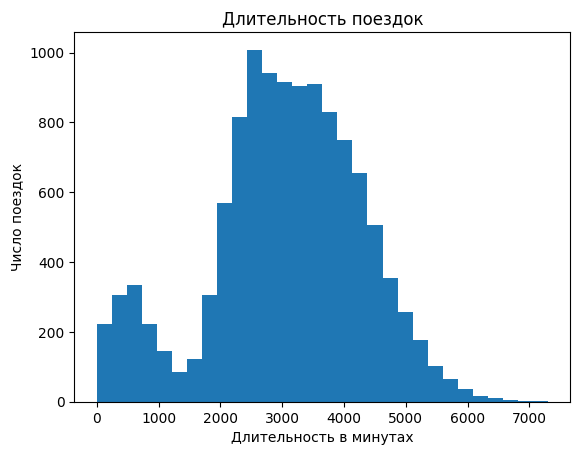

In [114]:
#визуализируем данные по длительности поездок пользователей с подпиской
users_non_subscribers.hist(column='distance', bins=30, range=(0, 7300), grid=False)

plt.title('Длительность поездок')
plt.ylabel('Число поездок')
plt.xlabel('Длительность в минутах')

plt.show()

- В целом график повторяет ситуацию с расстоянием, да и в целом почти не отличается от общей картины - буквально на минуту: медиана уже 19 минут, а 50% значений лежат между 15 и 22 минутами.
- Примечательно и то, что единичные рекорды длительности принадлежат пользователям с подпиской.

### Сравнительные графики

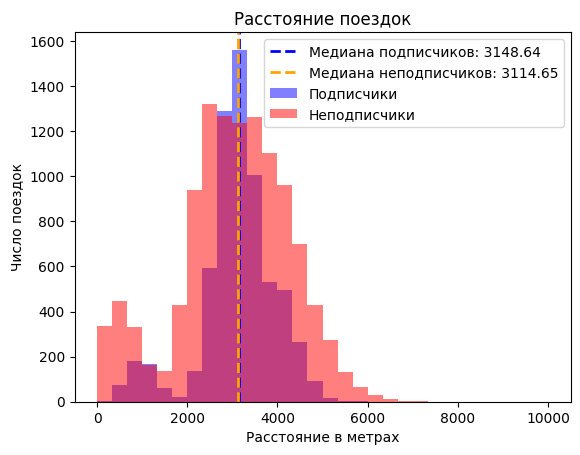

In [115]:
#строим гистограмму для пользователей без подписки
users_subscribers['distance'].hist(bins=30, range=(0, 10000), alpha=0.5, label='Подписчики', color='blue', grid=False)

#строим гистограмму для пользователей с подпиской
users_non_subscribers['distance'].hist(bins=30, range=(0, 10000), alpha=0.5, label='Неподписчики', color='red', grid=False)

#отметим медианы для обоих значений
median_subscribers = users_subscribers['distance'].median()
median_non_subscribers = users_non_subscribers['distance'].median()
plt.axvline(median_subscribers, color='blue', linestyle='dashed', linewidth=2, label=f'Медиана подписчиков: {median_subscribers:.2f}')
plt.axvline(median_non_subscribers, color='orange', linestyle='dashed', linewidth=2, label=f'Медиана неподписчиков: {median_non_subscribers:.2f}')

plt.title('Расстояние поездок')
plt.ylabel('Число поездок')
plt.xlabel('Расстояние в метрах')

plt.legend()

plt.show()

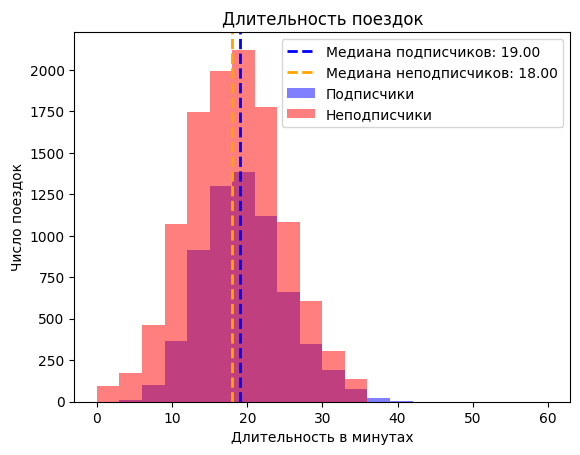

In [116]:
#строим гистограмму для пользователей без подписки
users_subscribers['duration'].hist(bins=20, range=(0, 60), alpha=0.5, label='Подписчики', color='blue', grid=False)

#строим гистограмму для пользователей с подпиской
users_non_subscribers['duration'].hist(bins=20, range=(0, 60), alpha=0.5, label='Неподписчики', color='red', grid=False)

#отметим медианы для обоих значений
median_subscribers = users_subscribers['duration'].median()
median_non_subscribers = users_non_subscribers['duration'].median()
plt.axvline(median_subscribers, color='blue', linestyle='dashed', linewidth=2, label=f'Медиана подписчиков: {median_subscribers:.2f}')
plt.axvline(median_non_subscribers, color='orange', linestyle='dashed', linewidth=2, label=f'Медиана неподписчиков: {median_non_subscribers:.2f}')

plt.title('Длительность поездок')
plt.ylabel('Число поездок')
plt.xlabel('Длительность в минутах')

plt.legend()

plt.show()

- На сравнительных графиках заметна разница в объеме поездок в целом.
- На сравнительных графиках также заметнее, что значения пользователей с подпиской в принципе в более компактных диапазонах лежат. Особенно это заметно на поездках на суперкороткие дистанции.
- На сравнительных графиках заметно, что медианы и паттерны в целом схожи.

### Выводы о паттернах поведения по типу подписки

- Сейчас пользователи без подписки совершают почти вдвое больше поездок, чем пользователи с подпиской.
- Большинство аномальных поездок - и очень коротких, и очень больших, - совершают пользователи без подписки.
- В остальном паттерны по времени и длительности у двух групп довольно схожи.

## Доходность разных типов пользователей

Для дальнейшей проверки гипотез о доходах создадим таблицу о доходах.

In [117]:
#создадим таблицу, в которой посчитаем помесячные показатели для каждого пользователя: число поездок, дистанцию, время в поездке.
users_revenue = users_full.groupby(['month', 'user_id', 'subscription_type']).agg({'distance': ['count', 'sum'], 'duration': 'sum'}).reset_index()
users_revenue.columns = ['month', 'user_id', 'subscription_type', 'trips_per_month', 'distance_per_month', 'duration_per_month']

#добавим данные по условиям подписки, потому что они нам еще пригодятся
users_revenue = users_revenue.merge(subscriptions, how='outer', on='subscription_type')

users_revenue.head(5)

,month,user_id,subscription_type,trips_per_month,distance_per_month,duration_per_month,minute_price,start_ride_price,subscription_fee
0,1,1,ultra,2,7027.511294,42.0,6,0,199
1,1,3,ultra,1,3061.777147,13.0,6,0,199
2,1,5,ultra,1,3914.646990,13.0,6,0,199
3,1,7,ultra,2,6478.080979,28.0,6,0,199
4,1,12,ultra,1,3577.151148,33.0,6,0,199


In [118]:
#проверим данные в таблице
users_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11331 entries, 0 to 11330
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   month               11331 non-null  int64  
 1   user_id             11331 non-null  int64  
 2   subscription_type   11331 non-null  object 
 3   trips_per_month     11331 non-null  int64  
 4   distance_per_month  11331 non-null  float64
 5   duration_per_month  11331 non-null  float64
 6   minute_price        11331 non-null  int64  
 7   start_ride_price    11331 non-null  int64  
 8   subscription_fee    11331 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 885.2+ KB


In [119]:
#проверим пропуски в таблице
users_revenue.isna().sum()

month                 0
user_id               0
subscription_type     0
trips_per_month       0
distance_per_month    0
duration_per_month    0
minute_price          0
start_ride_price      0
subscription_fee      0
dtype: int64

In [120]:
#проверим дубликаты в таблице
users_revenue.duplicated().sum()

0

In [121]:
#добавим столбец с ежемесячной выручкой
users_revenue['revenue_per_month'] = users_revenue['duration_per_month'] * users_revenue['minute_price'] + users_revenue['start_ride_price'] * users_revenue['trips_per_month'] + users_revenue['subscription_fee']

users_revenue.head(5)

,month,user_id,subscription_type,trips_per_month,distance_per_month,duration_per_month,minute_price,start_ride_price,subscription_fee,revenue_per_month
0,1,1,ultra,2,7027.511294,42.0,6,0,199,451.0
1,1,3,ultra,1,3061.777147,13.0,6,0,199,277.0
2,1,5,ultra,1,3914.646990,13.0,6,0,199,277.0
3,1,7,ultra,2,6478.080979,28.0,6,0,199,367.0
4,1,12,ultra,1,3577.151148,33.0,6,0,199,397.0


Рекомендуется отдельное исследование по вопросу зачем нам в этой таблице суммарный метраж поездок за каждый месяц.

In [122]:
# Комментарий ревьюера
# Контроль суммы выручки
tmp, col_rev = users_revenue.copy(), 'revenue_per_month'
print("Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице:", tmp[col_rev].sum())

Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице: 3878641.0


## Проверка гипотез

### Гипотеза №1: пользователи с подпиской тратят больше времени на поездки

Проверим, тратят ли пользователи с подпиской больше времени на поездки и, следовательно, являются ли они более выгодными для бизнеса.

**Нулевая гипотеза:**
Среднее время поездки пользователей с подпиской равно среднему времени поездки пользователей без подписки.

**Альтернативная гипотеза:**
Среднее время поездки пользователей с подпиской больше среднего времени поездки пользователей без подписки.

**Проведем двухвыборочный t-test для независимых выборок.**

In [123]:
#уровень статистической значимости
alpha = 0.05

#проведем двухвыборочный t-test для независимых выборок
results = st.ttest_ind(users_subscribers['duration'], users_non_subscribers['duration'], alternative='greater')

print('Среднее значение среди пользователей с подпиской', users_subscribers['duration'].mean())
print('Среднее значение среди пользователей без подписки', users_non_subscribers['duration'].mean())
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')


Среднее значение среди пользователей с подпиской 19.037692307692307
Среднее значение среди пользователей без подписки 17.890992392807746
p-значение: 2.495945372073663e-34
Отвергаем нулевую гипотезу


**Вывод:** 
Нулевая гипотеза отвергнута, а значит, есть основания полагать, что пользователи с подпиской действительно больше времени проводят за использованием сервиса, при установленном уровне значимости в 5 %.

### Гипотеза №2: средняя дальность поездки пользователя с подпиской равна 3130 метров

Проверим, насколько средняя дальность поездки пользователя с подпиской соответствует дистанции, которая оптимальна с точки зрения износа самоката.

**Нулевая гипотеза:** 
Средняя дальность поездки для пользователей с подпиской равно оптимальному для износа самоката расстоянию в 3130 метров.

**Альтернативная гипотеза:** 
Средняя дальность поездки для пользователей с подпиской больше оптимального для износа самоката расстояния в 3130 метров.

**Проведем одновыборочный t-test.**

In [124]:
#уровень статистической значимости
alpha = 0.05

#значение, которому в идеале должна соответствовать средняя дальность поездки пользователей с подпиской
perfect_distance = 3130

#проведем двухвыборочный t-test для независимых выборок
results = st.ttest_1samp(users_subscribers['distance'], perfect_distance, alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

0.9195368847849785
Не отвергаем нулевую гипотезу


**Вывод:**
Нулевая гипотеза не отвергнута, а значит, есть основания полагать, что дальность поездки среди пользователей с подпиской соответствует оптимальному значению с точки зрения износа самоката, при установленном уровне значимости в 5%.

### Гипотеза №3: помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки

Проверим, насколько помесячная выручка от пользователей с подпиской выше, чем помесячная выручка от пользователей без подписки.

**Нулевая гипотеза:**
Средняя ежемесячная выручка от пользователей с подпиской равна средней ежемесячной выручке от пользователей без подписки.

**Альтернативная гипотеза:**
Средняя ежемесячная выручка от пользователей с подпиской больше средней ежемесячной выручки от пользователей без подписки.

**Проведем двухвыборочный t-test для независимых выборок.**

In [125]:
#уровень статистической значимости
alpha = 0.05

#определим два массива для исследования: с выручкой от пользователей с подпиской и без
users_revenue_subscribers = users_revenue.loc[users_revenue['subscription_type'] == 'ultra']['revenue_per_month']
users_revenue_non_subscribers = users_revenue.loc[users_revenue['subscription_type'] == 'free']['revenue_per_month']

#проведем двухвыборочный t-test для независимых выборок
results = st.ttest_ind(users_revenue_subscribers, users_revenue_non_subscribers, alternative='greater')

print('Среднее значение среди пользователей с подпиской', users_revenue_subscribers.mean())
print('Среднее значение среди пользователей без подписки', users_revenue_non_subscribers.mean())
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')


Среднее значение среди пользователей с подпиской 362.7921906022502
Среднее значение среди пользователей без подписки 328.6413651073845
p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод:** 
Нулевая гипотеза отвергнута, а значит, есть основания полагать, что пользователи с подпиской действительно приносят больше выручки, при установленном уровне значимости в 5 %.

### Гипотеза №4: обновление серверов уменьшает количество обращений в техподдержку

Продумаем план оценки эффективности обновления серверов в целях уменьшения количества обращений в техподдержку.

**Нулевая гипотеза:** Среднее число обращений пользователей в техподдержку после обновления серверов равно среднему числу обращений пользователей в техподдержку до обновления.

**Альтернативная гипотеза:** Среднее число обращений пользователей в техподдержку после обновления серверов меньше среднего числа обращений пользователей в техподдержку до обновления.

**Для проверки можно использовать двухвыборочный t-test для зависимых выборок, если у нас есть два парных набора данных** - согласованные и идентичные в объеме замеры показателя (число обращений) для одних и тех же пользователей до и после обновления. Такой тест реализуется с помощью метода scipy.stats.ttest_rel(), в параметре alternative указываем 'less' (при условии, что первой будет указана выборка с данными после обновления).

**Для проверки можно использовать двухвыборочный t-test для независимых выборок, если наборы данных до и после не соответствуют критериям парной выборки**, и мы просто сопоставляем два средних значения по двум выборкам. Такой тест реализуется с помощью метода scipy.stats.ttest_ind(), в параметре alternative указываем 'less' (при условии, что первой будет указана выборка с данными после обновления).

При проверке гипотезы о том, что обновление серверов снизило количество обращений в техподдержку, используется левосторонний тест (в обеих опциях выше), т.к. мы хотим определить, есть ли статистически значимое снижение.

### Выводы по гипотезам

- Гипотеза №1: пользователи с подпиской тратят больше времени на поездки.
  Есть основания полагать, что пользователи с подпиской действительно больше времени проводят за использованием сервиса, при установленном уровне значимости в 5%.
- Гипотеза №2: средняя дальность поездки пользователя с подпиской равна 3130 метров.
  Есть основания полагать, что дальность поездки среди пользователей с подпиской соответствует оптимальному значению с точки зрения износа самоката, при установленном уровне значимости в 5%.
- Гипотеза №3: помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.
  Есть основания полагать, что пользователи с подпиской действительно приносят больше выручки, при установленном уровне значимости в 5%.
- Гипотеза №4: обновление серверов уменьшает количество обращений в техподдержку.
  Для проверки этой гипотезы нужен двухвыборочный левосторонний t-test для зависимых выборок, если у нас есть два парных набора данных с идентичными в объеме замерами обращений для одних и тех же пользователей.
  Если такой парной выборки нет, то для проверки приемлем двухвыборочный левосторонний t-test для зависимых выборок .

## Рассчеты для промо

### Раздача промокодов

Отдел маркетинга планирует акцию по рассылке промокодов на пробный бесплатный месяц использования сервиса с целью стимуляции подписки на сервис.
Вероятность успеха - пользователь оформит подписку после бесплатного периода, - 10%.
Чтобы определить число промокодов для акции, при котором вероятность не достичь kpi в 100 новых подписчиков составляет 5%, мы можем воспользоваться кумулятивной функцией распределения для биноминальных распределений и немного нудным перебором. Начнем с 1000 промокодов.

In [126]:
#зададим вероятность активации промокода, цель и необходимую вероятность успеха - 95%
p = 0.1
kpi = 100
target_prob = 0.95
n = 1000

while True:
    prob = st.binom.cdf(kpi - 1, n, p)
    if prob <= (1 - target_prob):
        break
    n += 1

print(f'Необходимо разослать минимум {n} промокодов.')

Необходимо разослать минимум 1161 промокодов.


При рассылке промокодов в количестве от 1161 штуки мы имеем 95% вероятность достичь kpi. 

### Push-уведомления

Отдел маркетинга планирует разослать 1 млн уведомлений.
Вероятность успеха - пользователь откроет уведомление, - около 40%.
Чтобы выяснить, какова вероятность не достичь kpi в 399.5 тысяч успехов мы можем воспользоваться нормальной апроксимацией биноминального распределения - в данном случае и число попыток велико, и вероятность довольно близка к 0.5.

In [127]:
#укажем kpi
kpi = 399500

# параметры биномиального распределения
n = 1000000
p = 0.4

#вычислим параметры для нормального распределения по правилам апроксимации 
mu = n * p
sigma = (n * p * (1 - p))**0.5

#задаём нормальное распределение
distr = st.norm(mu, sigma) 

#считаем вероятность хвоста слева от 399.5 тысяч
result = distr.cdf(kpi)
print('Вероятность открытия сообщений:', result)

Вероятность открытия сообщений: 0.15371708296369768


При рассылке 1 млн уведомлений вероятность не достичь kpi в 399.5 тысяч оценивается приблизительно в 15%. 

## Общие выводы

**Основные моменты исследования**

1. Обзор и предобработка данных.
   Пробелов в данных не выявлено, обработка потребовалась минимальная.
2. Исследование основных значений для всех пользователей.
   - Сейчас сервис в целом одинаково популярен в разных городах. Популярнее всего - в Пятигорске (219 человек, 14.3% от всех пользователей). Наименее популярен - в Москве (168 человек, 11% от всех пользователей)
   - Пользователей без подписки 54%, при этом на них приходится почти 2/3 всех поездок. Пользователей с подпиской - 46%.
   - Большая часть пользователей проживают свой третий десяток: медиана 25 лет, 50% всех пользователей - в возрасте от 22 до 28. Небольшая группа пользователей - меньше 100 человек, - подростки, включая подростка 12 лет.
   - В среднем пользователи проезжают 3100 метров за поездку, 50% поездок - в диапазоне от 2500 до 3800 метров.
   - В среднем пользователи проводят в поездке 18 минут, 50% поездок - в диапазоне от 14 до 22 минут.
   - 95 поездок имеют значение до 1 минуты, но при этом большие расстояния, даже больше 6 км.
3. Исследование основных значений по типам пользователей
   Сейчас пользователей без подписки большинство и в общем числе пользователей, и в данных по поездкам. Плюс, эта группа оказалась более склонной к "экстремальным поездкам" (например, очень коротким или очень длинным), поэтому их след заметнее в общей картине.
   Паттерны пользователей с подпиской несколько приятнее для бизнеса: более компактный диапазон расстояний для поездок и несколько большее время использования сервиса.
4. Проверка гипотез для планирования развития сервиса:
   - **Есть основания полагать, что пользователи с подпиской действительно больше времени проводят за использованием сервиса**, при установленном уровне значимости в 5%.
   - **Есть основания полагать, что дальность поездки среди пользователей с подпиской соответствует оптимальному значению с точки зрения износа самоката**, при установленном уровне значимости в 5%.
   - **Есть основания полагать, что пользователи с подпиской действительно приносят больше выручки**, при установленном уровне значимости в 5%.
   - Для (планирования) проверки влияния обновления серверов на уменьшение числа обращений рекомендуется создание парных выборок - проведение замеров частоты обращений среди одной и той же группы пользователей до и после обновления, - чтобы провести двухвыборочный t-test для зависимых выборок. При отсутствии таких парных данных приемлем двухвыборочный t-test для зависимых выборок 
5. Рассчеты для планирования промо:
   - **Рекомендуется раздача промокодов в количестве от 1161 штук, чтобы с вероятностью в 95% достичь kpi в 100 новых подписчиков** в промоакции с раздачей промокодов на бесплатный период использования сервиса и вероятностью успеха (оформление подписки) в 10%.
   - **Есть около 15% вероятности не достичь kpi в 399.5 тысяч открытых push-уведомлений при рассылке 1 млн уведомлений** с вероятностью успеха (открытие уведомления) в 40%. 


**Рекомендуется уделить внимание контролю расстояния поездок для оптимизации расходов на износ и, следовательно, увеличению прибыли.** 
Сейчас значения по средней и медианной дальности поездки в целом укладываются в оптимальный для износа паттерн. Однако, если смотреть на медианные значения, значимая часть пользователей часто превышает оптимальный порог дальности в 3130 метров (сама медиана среди пользователей с подпиской равна 3148). Плюс, в свете привлечения дополнительного внимания к сервису, растет и вероятность экстремально долгих поездок. Тарификация, информирование о рисках супердолгих поездок и другие инструменты помогли бы скорректировать паттерны поведения пользователей.


**Рекомендуется обратить внимание на экстремальные значения возраста пользователей.**
Сейчас в базе есть даже подростки 12 лет, что выглядит рискованно с точки зрения репутации бренда в вопросах безопасности сервиса.

**Рекомендуется обратить внимание на исправность счетчиков времени самокатов.**
Сейчас в базе есть 95 поездок, у которых продолжительность до минуты, но расстояния большие, порой - больше 6 км. Такая ситуация говорит скорее о дефектах счетчика времени, и плохо влияет на доходность бизнеса поминутной аренды самокатов.

**Стимуляция подписки на сервис выглядит выгодным решением для бизнеса.**
В целом паттерны использования сервиса среди подписчиков выглядят более здоровыми, компактными и выгодными для бизнеса - как с точки зрения доходов от самих поездок, так и с точки зрения поддержания рабочего состояния парка устройств.
